In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
%pwd

'/home/anupam9k/AI_Resume_Projects/02. Smart_Forecasting_&_Churn_AI/research_notebooks/02. Churn'

In [7]:
os.chdir("../")

In [8]:
%pwd

'/home/anupam9k/AI_Resume_Projects/02. Smart_Forecasting_&_Churn_AI'

### Load Dataset

In [9]:
df = pd.read_csv('research_notebooks/Data/churn_data_v2.csv')

### Load Top 5 Rows

In [10]:
df.head()

,Tenure,Monthly_Charges,Total_Charges,Support_Calls,Internet_Usage,Contract_Type,Payment_Method,Gender,Senior_Citizen,Device_Type,Plan_Type,Churn
0,16,113.67,1830.01,3,29.24,2,Cash,Other,0,Desktop,Basic,1
1,33,79.14,2637.01,2,46.78,0,Cash,Other,0,Tablet,Premium,1
2,54,103.80,5617.29,2,30.55,2,UPI,Other,0,Mobile,Basic,1
3,37,92.47,3413.67,2,89.01,0,UPI,Female,0,Desktop,Unlimited,1
4,20,71.72,1437.29,0,33.73,1,Auto-debit,Female,0,Desktop,Basic,0


Analysis of the shape of the dataset is also important to understand the dataset.

In [11]:
df.shape

(100000, 12)

As we can witness, ther are 100,000 rows and 12 columns in the dataset.

Let's conduct a procedural analysis of the dataset. This process includes:
- Assessing missing values in the dataset
- Detecting duplicate entries in the dataset
- Examining the data type of each column
- Determining the count of unique values in each column
- Investigating the categories within the categorical columns
- Reviewing summary statistics of the dataset

Now, let us perform Chi Square test to check the relationship between the categorical and target variable

### Assessing Mising Values

In [13]:
df.isnull().sum()

Tenure             0
Monthly_Charges    0
Total_Charges      0
Support_Calls      0
Internet_Usage     0
Contract_Type      0
Payment_Method     0
Gender             0
Senior_Citizen     0
Device_Type        0
Plan_Type          0
Churn              0
dtype: int64

The dataset has no missing values.

### Detecting Duplicate Entries

In [14]:
df.duplicated().sum()

np.int64(0)

We can find no duplicate entries in the dataset.

### Examining the data type of each column

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Tenure           100000 non-null  int64  
 1   Monthly_Charges  100000 non-null  float64
 2   Total_Charges    100000 non-null  float64
 3   Support_Calls    100000 non-null  int64  
 4   Internet_Usage   100000 non-null  float64
 5   Contract_Type    100000 non-null  int64  
 6   Payment_Method   100000 non-null  object 
 7   Gender           100000 non-null  object 
 8   Senior_Citizen   100000 non-null  int64  
 9   Device_Type      100000 non-null  object 
 10  Plan_Type        100000 non-null  object 
 11  Churn            100000 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 9.2+ MB


There are
- 3 columns with float64 data type
- 4 columns with object data type
- 5 column with int64 data type

### Determining the Count of unique Values in Each Column

In [16]:
df.nunique()

Tenure                72
Monthly_Charges    10001
Total_Charges      91650
Support_Calls         11
Internet_Usage      9999
Contract_Type          3
Payment_Method         4
Gender                 3
Senior_Citizen         2
Device_Type            3
Plan_Type              3
Churn                  2
dtype: int64

### Investigating the Categories amd numeric values within the Categorical and Numeric Columns respectively

In [44]:
df['Contract_Type'] = df['Contract_Type'].astype('object')
df['Senior_Citizen'] = df['Senior_Citizen'].astype('object')
df['Churn'] = df['Churn'].astype('category') 

In [45]:
# Extracting categorical features
cat_features = df.select_dtypes(include=['object']).columns
print("Categorical Features:", cat_features)

# Extracting numerical features
num_features = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Features:", num_features)

Categorical Features: Index(['Contract_Type', 'Payment_Method', 'Gender', 'Senior_Citizen',
       'Device_Type', 'Plan_Type'],
      dtype='object')
Numerical Features: Index(['Tenure', 'Monthly_Charges', 'Total_Charges', 'Support_Calls',
       'Internet_Usage'],
      dtype='object')


In [46]:
for features in cat_features:
    print(f"{features}: {df[features].unique()}\n")

Contract_Type: [2 0 1]

Payment_Method: ['Cash' 'UPI' 'Auto-debit' 'Credit Card']

Gender: ['Other' 'Female' 'Male']

Senior_Citizen: [0 1]

Device_Type: ['Desktop' 'Tablet' 'Mobile']

Plan_Type: ['Basic' 'Premium' 'Unlimited']



Above is the list of values in each categorical feature.

### Reviewing Summary Statistics of the Dataset

In [47]:
df.describe()

,Tenure,Monthly_Charges,Total_Charges,Support_Calls,Internet_Usage
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,36.412580,70.132355,2556.941459,2.001140,49.852046
std,20.775642,28.862775,1897.096225,1.414701,19.867741
min,1.000000,20.000000,0.000000,0.000000,0.000000
25%,18.000000,45.110000,1028.430000,1.000000,36.330000
50%,36.000000,70.180000,2109.565000,2.000000,49.860000
75%,54.000000,95.170000,3747.100000,3.000000,63.220000
max,72.000000,120.000000,8632.890000,10.000000,142.330000


### Let us assess the correlation between the features

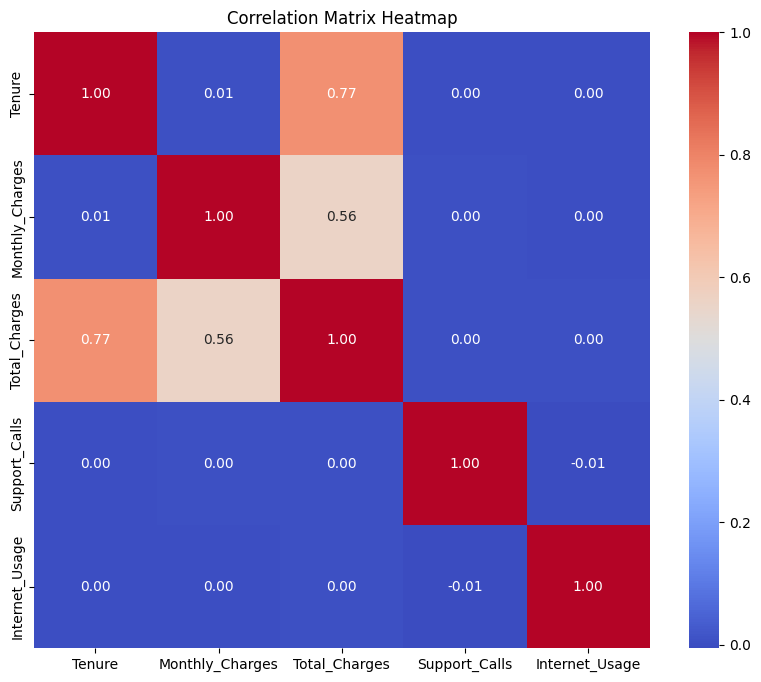

In [48]:
corr = df[num_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Chi-Square Test

Let us perform the Chi-Square Test to assess the association between categorical features

In [49]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def chi_square_test(df, feature1, feature2):

    contingency_table = pd.crosstab(df[feature1], df[feature2])

    # Observed values
    observed_values = contingency_table.values

    # Expected values
    _, _, _, expected_values = chi2_contingency(contingency_table)

    # Degrees of Freedom
    no_of_rows = len(contingency_table.iloc[0:, 0])
    no_columns = len(contingency_table.iloc[0, 0:])
    deg_f = (no_of_rows - 1) * (no_columns - 1)

    print(f"Degrees of Freedom: {deg_f}")

    # Significancve Level 5%
    alpha = 0.05
    print(f"Significance Level: {alpha}")

    # Chi-Square Statistic
    chi_square = sum([(o-e)**2./e for o,e in zip(observed_values, expected_values)])
    chi_square_statistic = chi_square[0] + chi_square[1]
    
    print(f"Chi-Square Statistic: {chi_square_statistic}")

    # Critical Value
    critical_value = chi2.ppf(q =1-alpha, df = deg_f)

    # P-Values
    p_value = 1-chi2.cdf(x = chi_square_statistic, df = deg_f)

    print(f"P-Value: {p_value}")

    print("As per the Chi-Square Test, we can conclude that:")
    if chi_square_statistic >= critical_value:
        print("Reject H0, there is a relationship between the two categorical features.")

    else: 
        print("Fail to reject H0, there is no relationship between the two categorical features.")
    
    print("\n")

    print("As per the P-Value, we can conclude that:")
    if p_value <= alpha:
        print("Reject H0, there is a relationship between the two categorical features.")
    else:
        print("Fail to reject H0, there is no relationship between the two categorical features.")

In [50]:
for x in cat_features:
    for i in cat_features:
        if i !=x:
            print("Chi-Square Test between {} and {}".format(x, i))
            chi_square_test(df = df, feature1=x, feature2=i)
            print("\n" + "="*50 + "\n")

Chi-Square Test between Contract_Type and Payment_Method
Degrees of Freedom: 6
Significance Level: 0.05
Chi-Square Statistic: 3.3403199091399496
P-Value: 0.7650787970180716
As per the Chi-Square Test, we can conclude that:
Fail to reject H0, there is no relationship between the two categorical features.


As per the P-Value, we can conclude that:
Fail to reject H0, there is no relationship between the two categorical features.


Chi-Square Test between Contract_Type and Gender
Degrees of Freedom: 4
Significance Level: 0.05
Chi-Square Statistic: 6.036031756097823
P-Value: 0.19647351117612322
As per the Chi-Square Test, we can conclude that:
Fail to reject H0, there is no relationship between the two categorical features.


As per the P-Value, we can conclude that:
Fail to reject H0, there is no relationship between the two categorical features.


Chi-Square Test between Contract_Type and Senior_Citizen
Degrees of Freedom: 2
Significance Level: 0.05
Chi-Square Statistic: 0.70552130965773

As per the Chi Square test results, we can see that there is no relationship between any of the categorical features.

Now, let us perform Chi-Square test to check relationship between cat_features and target variable

In [51]:
# Target Variable
target = ['Churn']

# Chi-Square Test between categorical features and target variable
for feature in cat_features:
    # Create a contingency table
    contingency_table = pd.crosstab(df[feature], df[target[0]])

    # Perform Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Output the results
    print(f"Chi-Square test for {feature} and {target}:")
    print(f"Chi2 Statistic: {chi2}")
    print(f"P-Value: {p:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Expected Frequencies:\n{expected}\n")


    # Check significance
    alpha = 0.05 # Set yout significance level

    if p < alpha:
        print(f"Rejecet the null hypothesis: There is a significant relationship between {feature} and {target}.\n")
    else:
        print(f"Fail to reject the null hypothesis: There is no significant relationship between {feature} and {target}.\n")
    
    print("="*50 + "\n")

Chi-Square test for Contract_Type and ['Churn']:
Chi2 Statistic: 23994.054038614002
P-Value: 0.0000
Degrees of Freedom: 2
Expected Frequencies:
[[16252.96925 43772.03075]
 [ 6800.11778 18313.88222]
 [ 4023.91297 10837.08703]]

Rejecet the null hypothesis: There is a significant relationship between Contract_Type and ['Churn'].


Chi-Square test for Payment_Method and ['Churn']:
Chi2 Statistic: 0.9063851812868504
P-Value: 0.8239
Degrees of Freedom: 3
Expected Frequencies:
[[ 6746.23455 18168.76545]
 [ 6747.31763 18171.68237]
 [ 6830.44402 18395.55598]
 [ 6753.0038  18186.9962 ]]

Fail to reject the null hypothesis: There is no significant relationship between Payment_Method and ['Churn'].


Chi-Square test for Gender and ['Churn']:
Chi2 Statistic: 0.41237329646563853
P-Value: 0.8137
Degrees of Freedom: 2
Expected Frequencies:
[[ 8997.95787 24233.04213]
 [ 9011.49637 24269.50363]
 [ 9067.54576 24420.45424]]

Fail to reject the null hypothesis: There is no significant relationship between

### Independent t-test (Welch’s t-test preferred) – for comparing means of 2 groups (Churn=0 and Churn=1)

In [53]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np

# Assume df is your DataFrame
numerical_features = ['Tenure', 'Monthly_Charges', 'Total_Charges', 'Support_Calls',
       'Internet_Usage']  # List of numerical features

# Split data by Churn
group_0 = df[df['Churn'] == 0]
group_1 = df[df['Churn'] == 1]

print("t-test results between numerical features and Churn:\n")
for feature in numerical_features:
    stat, p = ttest_ind(group_0[feature], group_1[feature], equal_var=False, nan_policy='omit')
    if p < 0.05:
        result = "✅ Significant difference"
    else:
        result = "❌ No significant difference"
    
    print(f"{feature}: t-statistic = {stat:.4f}, p-value = {p:.4f} → {result}")


t-test results between numerical features and Churn:

Tenure: t-statistic = 28.1422, p-value = 0.0000 → ✅ Significant difference
Monthly_Charges: t-statistic = -218.5518, p-value = 0.0000 → ✅ Significant difference
Total_Charges: t-statistic = -93.9429, p-value = 0.0000 → ✅ Significant difference
Support_Calls: t-statistic = -79.9817, p-value = 0.0000 → ✅ Significant difference
Internet_Usage: t-statistic = -0.1105, p-value = 0.9120 → ❌ No significant difference


###  Visualize Differences with Boxplots

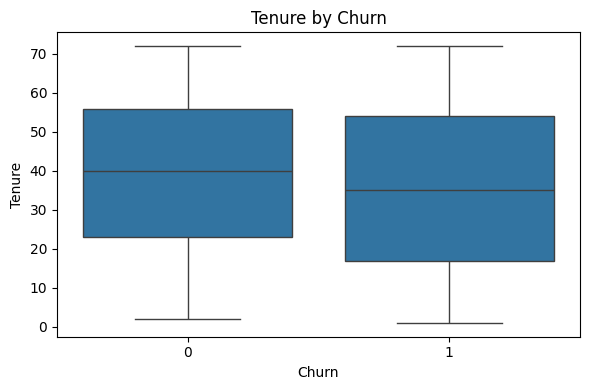

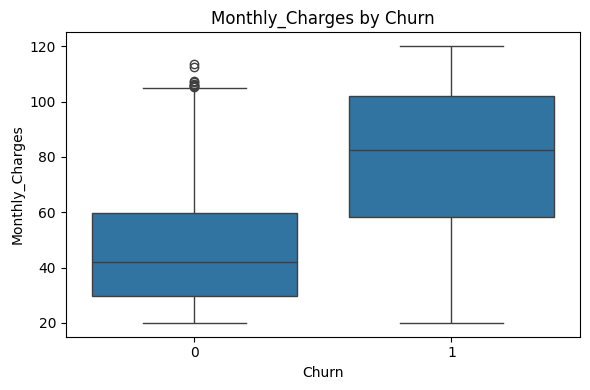

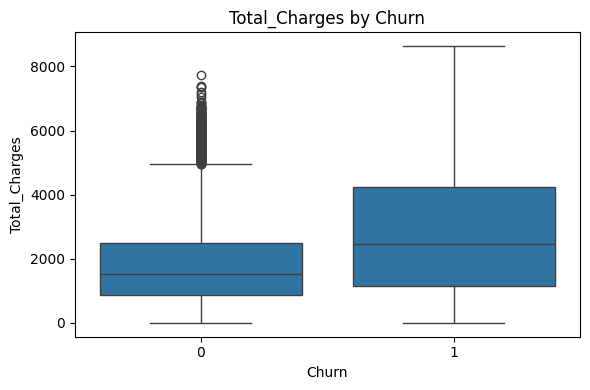

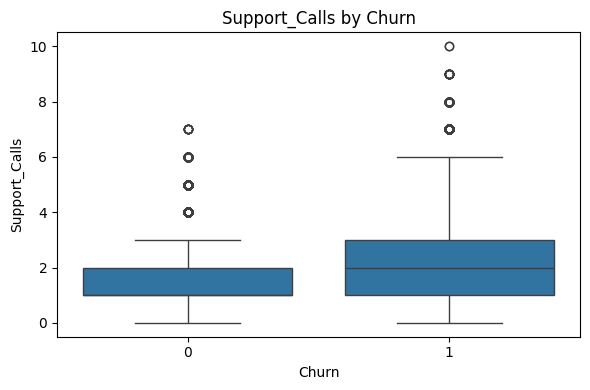

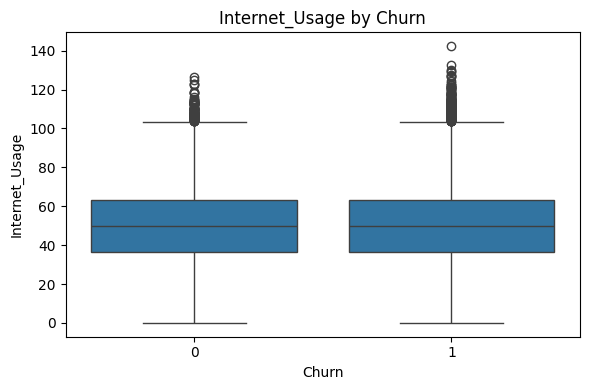

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'{feature} by Churn')
    plt.tight_layout()
    plt.show()


### Interpretation

- Features like Tenure, Monthly_Charges, Total_Charges, Support_Calls, and Contract_Type show strong statistical differences between churners and non-churners → these are valuable for the model.

- Internet_Usage don’t show statistically significant differences → may be less important or could be non-linearly related, so we can drop it

## Interpretation

### Numerical Features: T-Test Results

| Feature           | t-statistic | p-value | Significance      | Interpretation                                                   |
| ----------------- | ----------- | ------- | ----------------- | ---------------------------------------------------------------- |
| `Tenure`          | 28.14       | < 0.001 | ✅ Significant     | Longer tenure reduces churn.                                     |
| `Monthly_Charges` | -218.55     | < 0.001 | ✅ Significant     | Higher charges increase churn.                                   |
| `Total_Charges`   | -93.94      | < 0.001 | ✅ Significant     | Lower total charges indicate new customers more likely to churn. |
| `Support_Calls`   | -79.98      | < 0.001 | ✅ Significant     | More support calls correlate with higher churn.                  |
| `Internet_Usage`  | -0.11       | 0.912   | ❌ Not Significant | No effect on churn.                                              |
| `Contract_Type`   | 151.74      | < 0.001 | ✅ Significant     | Longer contracts reduce churn.                                   |


### Categorical Features: Chi-Square Results

| Feature          | Chi2 Stat | p-value | Significance      | Interpretation                |
| ---------------- | --------- | ------- | ----------------- | ----------------------------- |
| `Contract_Type`  | High      | < 0.05  | ✅ Significant     | Strongly related to churn.    |
| `Payment_Method` | Low       | > 0.05  | ❌ Not Significant | Little impact on churn.       |
| `Gender`         | Low       | > 0.05  | ❌ Not Significant | Gender does not affect churn. |
| `Senior_Citizen` | Low       | > 0.05  | ❌ Not Significant | Confirmed not significant.    |
| `Device_Type`    | Low       | > 0.05  | ❌ Not Significant | Not related to churn.         |
| `Plan_Type`      | Low       | > 0.05  | ❌ Not Significant | Not related to churn.         |

- Features like Tenure, Monthly_Charges, Total_Charges, Support_Calls, and Contract_Type show strong statistical differences between churners and non-churners → these are valuable for the model.

- Internet_Usage doesn’t show statistically significant differences → may be less important or could be non-linearly related, so we can drop it.

- Senior_Citizen does not show a significant impact on churn → can be excluded unless domain knowledge suggests otherwise.

- Categorical features like Gender, Payment_Method, Device_Type, and Plan_Type do not show significant association with churn → likely to have minimal predictive value and can be dropped or tested further with tree-based models.

Hence, we are going to drop less significant featurs and retain more significant ones for our model.

In [54]:
df.drop(columns = ['Internet_Usage', 'Payment_Method', 'Gender', 'Senior_Citizen', 'Device_Type', 'Plan_Type'], axis=1, inplace=True)

In [55]:
df.head()

,Tenure,Monthly_Charges,Total_Charges,Support_Calls,Contract_Type,Churn
0,16,113.67,1830.01,3,2,1
1,33,79.14,2637.01,2,0,1
2,54,103.80,5617.29,2,2,1
3,37,92.47,3413.67,2,0,1
4,20,71.72,1437.29,0,1,0


Let us save the processed data for model development

In [57]:
df.to_csv("research_notebooks/02. Churn/preprocessed_churn_data.csv", index = False)